**About the dataset**

The Dataset has 4 factors (X,Y) – Assuming they are coordinates of the affected spatial area. Month and day
<br>•	Age – is the age of the patient (CRITICAL X1 VALUE)
<br>•	Dataset – is the flag used to identify potential liver disease (OUTPUT Y VALUE)
<br>•	Total_Bilirubin – This provides us details on the yellow pigments in skin often resulting in Jaundice. High value means high risk of disease. (CRITICAL X2 VALUE)
<br>•	Direct_Bilirubin – Also called conjugated bilirubin, if high value then high risk of liver disease (CRITICAL X2 VALUE)
<br>•	Alkaline_Phosphotase - Also called ALP is an enzyme found in various tissues throughout the body. High value means high risk of disease. (CRITICAL X3 VALUE)
<br>•	Alamine_Aminotransferase - Also called ALT is an enzyme found primarily in the liver and is used in the metabolism of amino acids. High value means high risk of disease. (CRITCAL X4 Value)
<br>•	Aspartate_Aminotransferase -  is an enzyme found in various tissues throughout the body, with the highest concentrations in the heart and liver. High value means high risk of disease.  (CRITICAL X5 Value)
<br>•	Total_Proteins - The total protein level is the sum of albumin and globulin levels. A decrease in total protein levels may be seen when there is a significant decrease in albumin due to liver disease. (NON-CRITICAL VALUE)
<br>•	Albumin – Albumin is a major protein produced by the liver, and it makes up a significant portion of the total protein in the blood. Decreased levels of albumin may be seen in liver diseases. Low value means high risk (CRITICAL X5 VALUE)
<br>•	Albumin_and_Globulin_Ratio - Ratio of albumin and globulin concentration. (NON-CRITICAL VALUE)

**1. Import Libraries/Dataset**




1.2 - Import the required libraries.

In [40]:
import pandas as pd # data processing
import matplotlib.pyplot as plt #plot package
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np
import seaborn as sns                  # for data visualisation
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

1.1 - Download the dataset.

In [41]:
#Reading dataset
liverdisease_tbl = pd.read_csv("liver_disease_1.csv")
'''
Data Visualization and Exploration [1M]
Print 2 rows for sanity check to identify all the features present in the dataset and if the
target matches with them.
'''


'\nData Visualization and Exploration [1M]\nPrint 2 rows for sanity check to identify all the features present in the dataset and if the\ntarget matches with them.\n'

**2. Data Visualization and Exploration [1M]**




2.a. Print 2 rows for sanity check to identify all the features present in the dataset and if the target matches with them.

In [42]:
#Printing first 2 rows of the dataset
# print(forest_tbl.iloc[:2])
liverdisease_tbl.head(2)

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,Yes
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,Yes


In [43]:
liverdisease_tbl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Total_Bilirubin             583 non-null    float64
 2   Direct_Bilirubin            583 non-null    float64
 3   Alkaline_Phosphotase        583 non-null    int64  
 4   Alamine_Aminotransferase    583 non-null    int64  
 5   Aspartate_Aminotransferase  583 non-null    int64  
 6   Total_Protiens              583 non-null    float64
 7   Albumin                     583 non-null    float64
 8   Albumin_and_Globulin_Ratio  579 non-null    float64
 9   Dataset                     583 non-null    object 
dtypes: float64(5), int64(4), object(1)
memory usage: 45.7+ KB


In [44]:
liverdisease_tbl.describe(include="all", percentiles = [0.1, 0.25, 0.5, 0.75, 0.9, 0.95])

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,416
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,NaN
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,NaN
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,NaN
10%,23.000000,0.700000,0.100000,150.000000,18.000000,19.000000,5.100000,2.000000,0.546000,NaN
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,NaN
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,NaN


2.b Comment on class imbalance with appropriate visualization method.
Answer - Look at the below plot we can see a good distribution among Age, Alkaline_Phosphotase, Direct_Bilirubin, Total_Proteins, Albumin, Albumin_and_Globulin_Ratio. However, Total_Bilirubin, Direct_Bilirubin, Alamine_Aminotransferase, Aspartate_Aminotransferase shows a partial distributions with majority values ranging between o-20 and providing us less capabilities on identifying the output. Considering how important all of the other factors are hence Direct_Bilirubin, Aspartate_Aminotransferase will be used in the model.

1.c Provide appropriate data visualizations to get an insight about the dataset. This also helps in understanding the distribution in datasets

<Figure size 100x300 with 0 Axes>

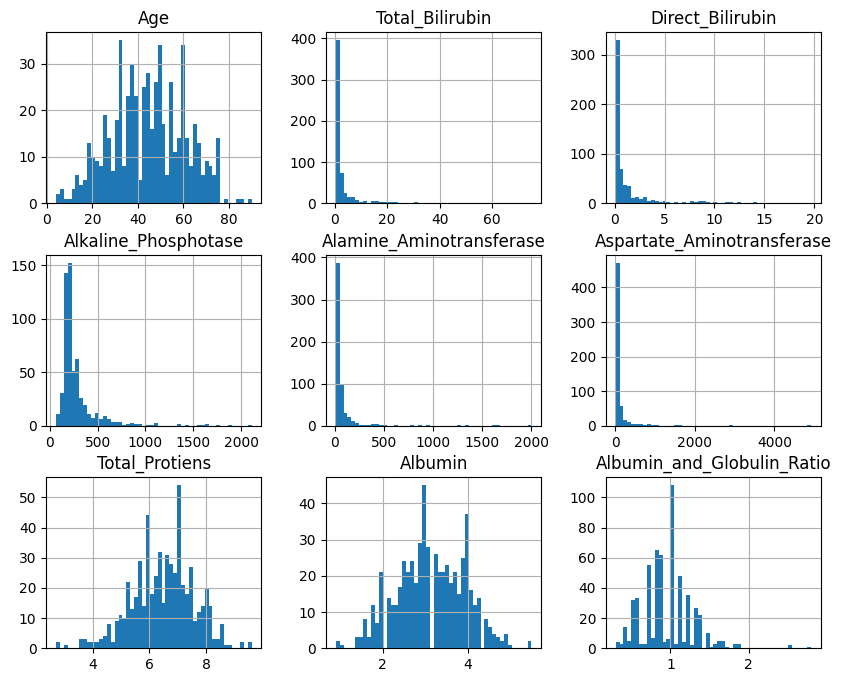

In [45]:
'''
Plot X & Y
'''
plt.figure(figsize=(1,3))
liverdisease_tbl.hist(bins=50, figsize=(10, 8))
plt.show()

2.c. Do the correlational analysis on the dataset. Provide a visualization for the same. Will this correlational analysis have an effect on feature selection that you will perform in the next step? Justify your answer.

Answer - Looking at the correlation table among attributes, we can clearly see how the entire dataset is moving towards a positive correlation, with weaker correlation between Total Proteins with all the other attributes except for albumin, which is clearly explained by this table as albumin is a component of total_protein

<ipython-input-46-6d8e28933a54>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(liverdisease_tbl.corr(),annot=True)


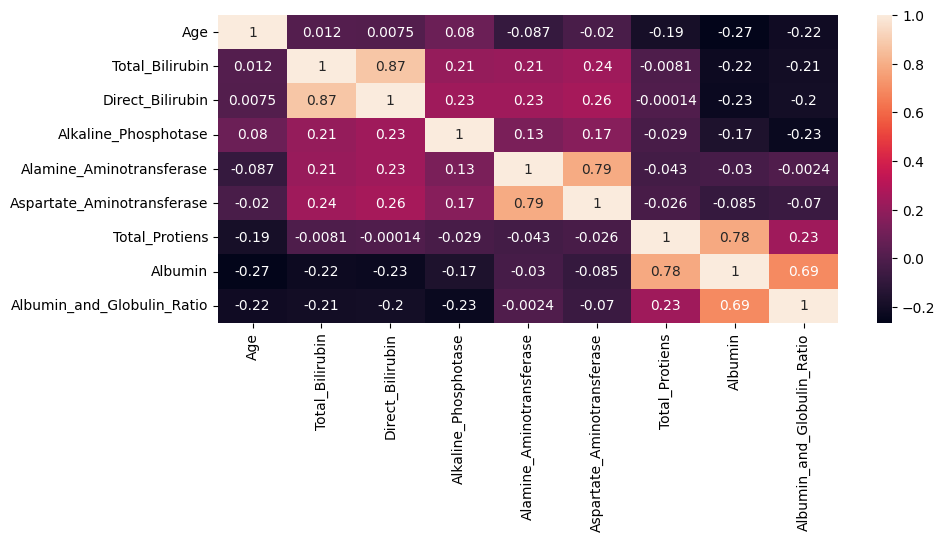

In [46]:
plt.figure(figsize=(10,4))
sns.heatmap(liverdisease_tbl.corr(),annot=True)
plt.show()

**3. Data Pre-processing and cleaning [2M]**

3.a Do the appropriate pre-processing of the data like identifying NULL or Missing Values if any, handling of outliers if present in the dataset, skewed data etc. Mention the pre-processing steps performed in the markdown cell. Explore a few latest data balancing tasks and its effect on model evaluation parameters.

In [47]:
#Checking for null values since the rest of the attributes do not have any null value except for albumin and globulin ratio, hence no need to clean the value or remove from table.
liverdisease_tbl.isnull().sum()

Age                           0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

<Axes: xlabel='Albumin', ylabel='Dataset'>

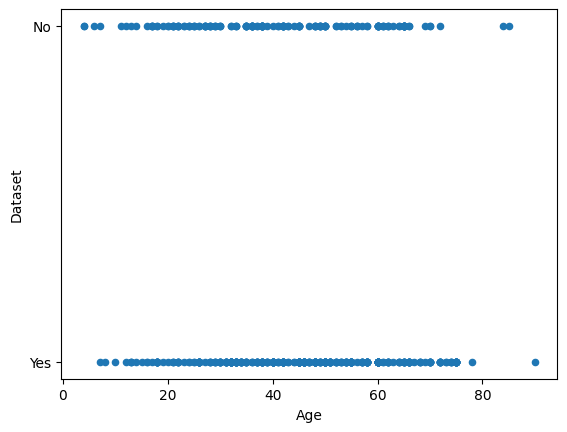

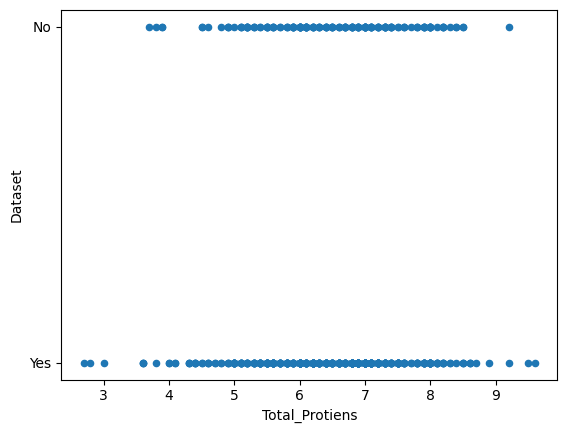

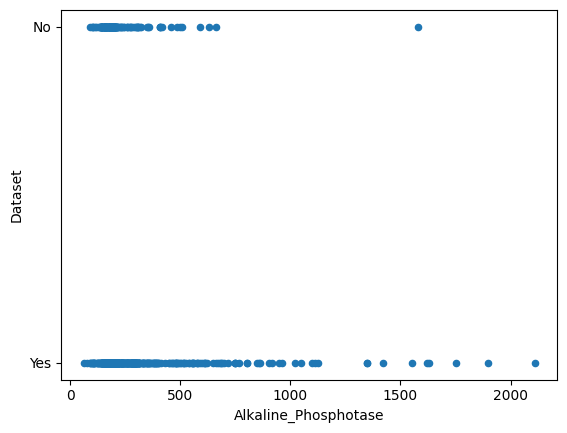

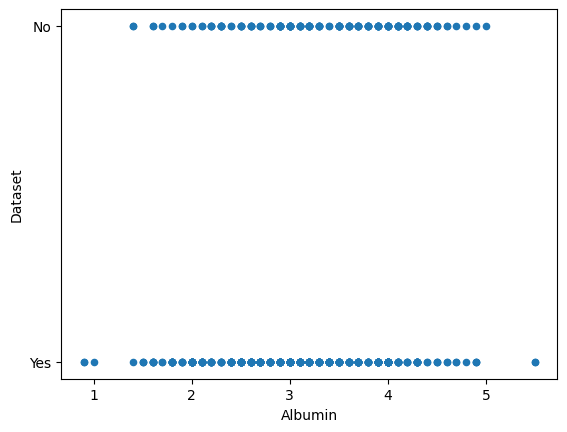

In [48]:
'''
Balanced Spread
'''
liverdisease_tbl.plot.scatter("Age","Dataset")
liverdisease_tbl.plot.scatter("Total_Protiens","Dataset")
liverdisease_tbl.plot.scatter("Alkaline_Phosphotase","Dataset")
liverdisease_tbl.plot.scatter("Albumin","Dataset")

In [49]:
liverdisease_tbl["X1-high_level"] = liverdisease_tbl["Age"]+liverdisease_tbl["Total_Bilirubin"]+liverdisease_tbl["Alkaline_Phosphotase"]+liverdisease_tbl["Aspartate_Aminotransferase"]
print(liverdisease_tbl.columns.to_list())

['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Dataset', 'X1-high_level']


3.b. Apply appropriate feature engineering techniques for them. Apply the feature transformation techniques like Standardization, Normalization, etc. You are free to apply the appropriate transformations depending upon the structure and the
complexity of your dataset. Provide proper justification. Techniques used without justification will not be awarded marks. Explore a few techniques for identifying feature importance for your feature engineering task.

In [50]:
'''Since, majority are numerical components thus taking sum of all the important components. In here we are using 2 components high level leading to liver disease (X1-high_level) and low level leading to leading to liver disease (X2-low_level)'''
liverdisease_tbl["X2-low_level"] = liverdisease_tbl["Albumin"]+liverdisease_tbl["Total_Protiens"]
required_columns = [ 'Dataset', 'X1-high_level','X2-low_level' ]
liverdisease_df = liverdisease_tbl[required_columns]
print(liverdisease_df)


    Dataset  X1-high_level  X2-low_level
0       Yes          270.7          10.1
1       Yes          871.9          10.7
2       Yes          627.3          10.3
3       Yes          261.0          10.2
4       Yes          329.9           9.7
..      ...            ...           ...
578      No          594.5           7.5
579     Yes          169.6           9.2
580     Yes          346.8           9.6
581     Yes          248.3          10.2
582      No          279.0          11.7

[583 rows x 3 columns]


*Calculating zscores to identify Outliers*

Zscore is one of the most critical formula's used to identify the distance of a point from its mean. Thus, this becomes one of our critical cases in identifying outliers.

Outliers can significantly impact the mean of a good distribution.Hence, they are critical in ensuring anomalies in the dataset and removing them to minimize the chances of error in prediction.

In [51]:
from scipy.stats import zscore
liverdisease_df[['zscore_X1','zscore_X2']] = liverdisease_df[[ 'X1-high_level', 'X2-low_level']].apply(zscore)
print(liverdisease_df)

    Dataset  X1-high_level  X2-low_level  zscore_X1  zscore_X2
0       Yes          270.7          10.1  -0.433993   0.267198
1       Yes          871.9          10.7   1.033215   0.604741
2       Yes          627.3          10.3   0.436277   0.379712
3       Yes          261.0          10.2  -0.457666   0.323455
4       Yes          329.9           9.7  -0.289518   0.042169
..      ...            ...           ...        ...        ...
578      No          594.5           7.5   0.356230  -1.195490
579     Yes          169.6           9.2  -0.680725  -0.239117
580     Yes          346.8           9.6  -0.248274  -0.014088
581     Yes          248.3          10.2  -0.488660   0.323455
582      No          279.0          11.7  -0.413737   1.167313

[583 rows x 5 columns]


<ipython-input-51-6d08f18f0ccb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  liverdisease_df[['zscore_X1','zscore_X2']] = liverdisease_df[[ 'X1-high_level', 'X2-low_level']].apply(zscore)
<ipython-input-51-6d08f18f0ccb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  liverdisease_df[['zscore_X1','zscore_X2']] = liverdisease_df[[ 'X1-high_level', 'X2-low_level']].apply(zscore)


In [52]:
liverdisease_df.describe()

,X1-high_level,X2-low_level,zscore_X1,zscore_X2
count,583.000000,583.000000,5.830000e+02,5.830000e+02
mean,448.532075,9.625043,-7.312618e-17,-8.531388e-16
std,410.109513,1.779076,1.000859e+00,1.000859e+00
min,120.700000,3.600000,-8.000634e-01,-3.389522e+00
25%,257.700000,8.350000,-4.657194e-01,-7.173038e-01
50%,314.900000,9.700000,-3.261247e-01,4.216880e-02
75%,486.350000,10.850000,9.229340e-02,6.891269e-01
max,6116.300000,14.400000,1.383200e+01,2.686259e+00


<Figure size 100x300 with 0 Axes>

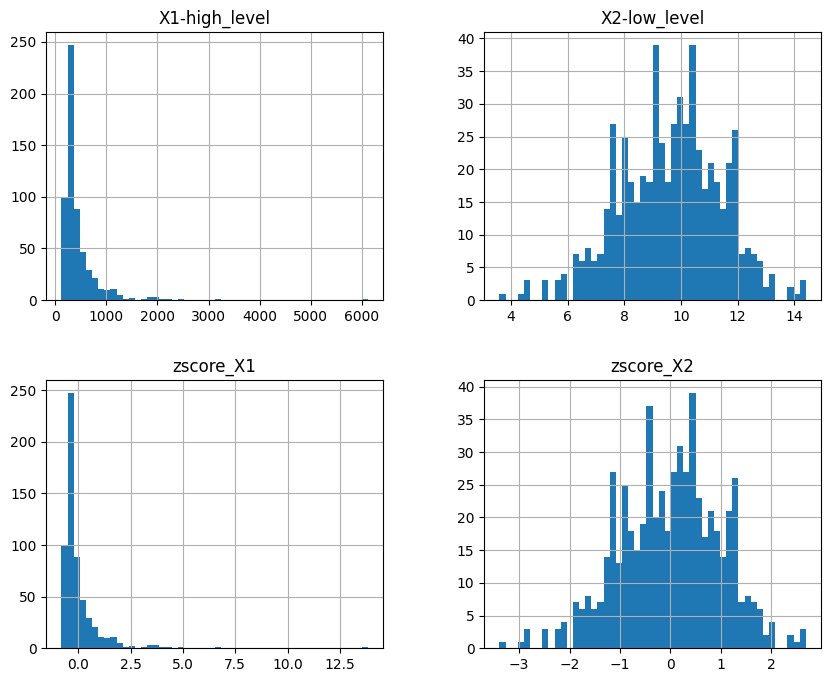

In [53]:
plt.figure(figsize=(1,3))
liverdisease_df.hist(bins=50, figsize=(10, 8))
plt.show()

*Identifying outliers*

In [54]:
'''Giving thresholds to zscores based on the spread'''
min_X1_zscore_threshold = -0.9
max_X1_zcore_threshold = 4
min_X2_zscore_threshold = -3
max_X2_zcore_threshold = 2.4
outliers = liverdisease_df[((((liverdisease_df['zscore_X1'] < min_X1_zscore_threshold) | (liverdisease_df['zscore_X1'] > max_X1_zcore_threshold))) | (((liverdisease_df['zscore_X2'] < min_X2_zscore_threshold) | (liverdisease_df['zscore_X2'] > max_X2_zcore_threshold))))]
print(outliers)

    Dataset  X1-high_level  X2-low_level  zscore_X1  zscore_X2
117     Yes         3184.7           9.0   6.677528  -0.351632
135     Yes         6116.3           9.4  13.832001  -0.126603
180     Yes          356.8           3.6  -0.223869  -3.389522
199     Yes         2504.2           8.1   5.016790  -0.857947
233     Yes         2234.0           9.2   4.357376  -0.239117
243     Yes          367.9          14.0  -0.196780   2.461230
270     Yes          326.7          14.4  -0.297327   2.686259
273     Yes          310.7          14.3  -0.336375   2.630001
372     Yes          391.7          14.2  -0.138697   2.573744
447     Yes         2129.3          11.2   4.101859   0.886027


Removing outliers

In [55]:
outlier_index = outliers.index
print(outlier_index)
liverdisease_df = liverdisease_df.drop(outlier_index)
# Reset the index and drop the old index
liverdisease_df = liverdisease_df.reset_index(drop=True)
liverdisease_df = liverdisease_df[['Dataset', 'X1-high_level', 'X2-low_level']]
print(liverdisease_df)

Int64Index([117, 135, 180, 199, 233, 243, 270, 273, 372, 447], dtype='int64')
    Dataset  X1-high_level  X2-low_level
0       Yes          270.7          10.1
1       Yes          871.9          10.7
2       Yes          627.3          10.3
3       Yes          261.0          10.2
4       Yes          329.9           9.7
..      ...            ...           ...
568      No          594.5           7.5
569     Yes          169.6           9.2
570     Yes          346.8           9.6
571     Yes          248.3          10.2
572      No          279.0          11.7

[573 rows x 3 columns]


**4. Model Building**

4.a. Split the dataset into training and test sets. Answers without justification will not
be awarded marks. [1M]
i. Train = 80 % Test = 20%
ii. Also, try to split the dataset with different ratios of your choice.
4.b. Build a Random Forest classification model to predict liver disease. [2M]
i. Tune hyperparameters (e.g., number of trees, maximum depth) using cross
validation. Justify your answer.
ii. Evaluate the model's performance using appropriate metrics.
4.c. Build a KNN classification model to predict liver disease. [2M]
i. Determine the optimal value of k through hyperparameter tuning and cross
validation. Justify your answer.
ii. Evaluate the KNN model's performance using appropriate metrics.

4 Starting Training Model.
4.a. Split the dataset into training and test sets.
Train = 80 % Test = 20%


In [56]:
X = liverdisease_df[['X1-high_level', 'X2-low_level']]
y = liverdisease_df['Dataset']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)


4.b Starting Implementing Random Forest for Train = 80% & Test = 20%

In [57]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)
X_test['Predicted_Dataset'] = y_pred
liverdisease = pd.concat([liverdisease_df, X_test['Predicted_Dataset']], axis=1)
print(liverdisease)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion)

    Dataset  X1-high_level  X2-low_level Predicted_Dataset
0       Yes          270.7          10.1               Yes
1       Yes          871.9          10.7               NaN
2       Yes          627.3          10.3               Yes
3       Yes          261.0          10.2                No
4       Yes          329.9           9.7               Yes
..      ...            ...           ...               ...
568      No          594.5           7.5               Yes
569     Yes          169.6           9.2                No
570     Yes          346.8           9.6               NaN
571     Yes          248.3          10.2                No
572      No          279.0          11.7               Yes

[573 rows x 4 columns]
Accuracy: 0.69
Classification Report:
               precision    recall  f1-score   support

          No       0.48      0.30      0.37       138
         Yes       0.74      0.86      0.80       321

    accuracy                           0.69       459
   macro av

4.c Using Cross Validation in Random Forest

In [58]:
# Perform cross-validation
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5)
print("at cv = 5:" ,cv_scores)
print(f"Mean CV Score 1 {cv_scores.mean():.2f}")
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=9)
print("at cv = 9:" ,cv_scores)
print(f"Mean CV Score {cv_scores.mean():.2f}")
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=50)
print("at cv = 50:" ,cv_scores)
print(f"Mean CV Score {cv_scores.mean():.2f}")

at cv = 5: [0.7826087  0.56521739 0.69565217 0.65217391 0.77272727]
Mean CV Score 1 0.69
at cv = 9: [0.76923077 0.53846154 0.69230769 0.69230769 0.69230769 0.61538462
 0.66666667 0.75       0.83333333]
Mean CV Score 0.69


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 29 members, which is less than n_splits=50.
  warnings.warn(


at cv = 50: [0.33333333 0.66666667 1.         0.66666667 1.         0.33333333
 0.66666667 0.33333333 0.66666667 0.66666667 0.33333333 0.66666667
 1.         0.66666667 1.         1.         1.         0.5
 0.5        0.5        0.5        0.         0.5        0.
 0.5        1.         0.         1.         1.         0.5
 1.         0.5        1.         0.5        1.         1.
 1.         1.         1.         1.         0.5        0.5
 1.         1.         1.         1.         1.         1.
 0.5        0.5       ]
Mean CV Score 0.71


Starting Implementing K Nearest Neighbhours for Train = 80% & Test = 20%

In [59]:
# Select features and target variable
X = liverdisease_df[['X1-high_level', 'X2-low_level']]
y = liverdisease_df['Dataset']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)
X_test['Predicted_Dataset'] = y_pred
liverdisease = pd.concat([liverdisease_df, X_test['Predicted_Dataset']], axis=1)
print(liverdisease)
# Evaluating Model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion)

    Dataset  X1-high_level  X2-low_level Predicted_Dataset
0       Yes          270.7          10.1               NaN
1       Yes          871.9          10.7               NaN
2       Yes          627.3          10.3               Yes
3       Yes          261.0          10.2               NaN
4       Yes          329.9           9.7               NaN
..      ...            ...           ...               ...
568      No          594.5           7.5               Yes
569     Yes          169.6           9.2                No
570     Yes          346.8           9.6               NaN
571     Yes          248.3          10.2               NaN
572      No          279.0          11.7               NaN

[573 rows x 4 columns]
Accuracy: 0.68
Classification Report:
               precision    recall  f1-score   support

          No       0.42      0.30      0.35        33
         Yes       0.75      0.83      0.79        82

    accuracy                           0.68       115
   macro av

Using Cross validation for KNN

In [60]:
# Perform cross-validation
cv_scores = cross_val_score(knn_classifier, X_train, y_train, cv=5)
print("at cv = 5:" ,cv_scores)
print(f"Mean CV Score 1 {cv_scores.mean():.2f}")
cv_scores = cross_val_score(knn_classifier, X_train, y_train, cv=9)
print("at cv = 9:" ,cv_scores)
print(f"Mean CV Score {cv_scores.mean():.2f}")
cv_scores = cross_val_score(knn_classifier, X_train, y_train, cv=50)
print("at cv = 50:" ,cv_scores)
print(f"Mean CV Score {cv_scores.mean():.2f}")

at cv = 5: [0.65217391 0.60869565 0.67391304 0.69230769 0.67032967]
Mean CV Score 1 0.66
at cv = 9: [0.70588235 0.62745098 0.66666667 0.68627451 0.64705882 0.70588235
 0.66666667 0.70588235 0.72      ]
Mean CV Score 0.68
at cv = 50: [0.6        0.7        0.6        0.9        0.7        0.8
 0.7        0.4        0.66666667 0.44444444 0.77777778 0.66666667
 0.66666667 0.55555556 0.77777778 0.66666667 0.33333333 0.66666667
 0.66666667 0.66666667 0.55555556 0.55555556 0.55555556 0.55555556
 0.77777778 0.77777778 0.66666667 0.88888889 0.55555556 0.55555556
 0.66666667 0.55555556 0.55555556 0.77777778 0.66666667 0.44444444
 0.88888889 0.77777778 0.77777778 0.88888889 0.66666667 0.77777778
 0.55555556 0.77777778 0.66666667 0.66666667 0.77777778 0.44444444
 0.77777778 0.77777778]
Mean CV Score 0.67


**Train 50 test 50**

In [61]:
X = liverdisease_df[['X1-high_level', 'X2-low_level']]
y = liverdisease_df['Dataset']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [62]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)
X_test['Predicted_Dataset'] = y_pred
liverdisease = pd.concat([liverdisease_df, X_test['Predicted_Dataset']], axis=1)
print(liverdisease)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion)

    Dataset  X1-high_level  X2-low_level Predicted_Dataset
0       Yes          270.7          10.1               Yes
1       Yes          871.9          10.7               NaN
2       Yes          627.3          10.3               Yes
3       Yes          261.0          10.2                No
4       Yes          329.9           9.7               NaN
..      ...            ...           ...               ...
568      No          594.5           7.5               Yes
569     Yes          169.6           9.2                No
570     Yes          346.8           9.6               NaN
571     Yes          248.3          10.2                No
572      No          279.0          11.7               Yes

[573 rows x 4 columns]
Accuracy: 0.68
Classification Report:
               precision    recall  f1-score   support

          No       0.39      0.35      0.37        77
         Yes       0.77      0.80      0.79       210

    accuracy                           0.68       287
   macro av

Using Cross Validation in Random Forest

In [63]:
# Perform cross-validation
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5)
print("at cv = 5:" ,cv_scores)
print(f"Mean CV Score 1 {cv_scores.mean():.2f}")
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=9)
print("at cv = 9:" ,cv_scores)
print(f"Mean CV Score {cv_scores.mean():.2f}")
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=50)
print("at cv = 50:" ,cv_scores)
print(f"Mean CV Score {cv_scores.mean():.2f}")

at cv = 5: [0.5862069  0.68421053 0.57894737 0.61403509 0.66666667]
Mean CV Score 1 0.63
at cv = 9: [0.53125    0.71875    0.625      0.625      0.5        0.625
 0.59375    0.67741935 0.64516129]
Mean CV Score 0.62
at cv = 50: [0.5        0.5        0.5        0.5        0.5        0.66666667
 0.66666667 0.66666667 0.5        0.83333333 0.83333333 0.5
 0.5        0.66666667 0.66666667 0.83333333 0.33333333 0.66666667
 0.5        0.5        0.66666667 0.5        0.5        0.33333333
 0.5        0.66666667 0.16666667 0.66666667 0.66666667 0.83333333
 0.66666667 0.5        0.5        0.33333333 0.83333333 0.83333333
 0.8        0.8        0.6        0.4        0.6        0.6
 0.4        0.8        0.8        0.6        0.6        0.6
 1.         0.8       ]
Mean CV Score 0.61


Starting Implementing K Nearest Neighbhours for Train = 50% & Test = 50%

In [64]:
# Select features and target variable
X = liverdisease_df[['X1-high_level', 'X2-low_level']]
y = liverdisease_df['Dataset']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)
X_test['Predicted_Dataset'] = y_pred
liverdisease = pd.concat([liverdisease_df, X_test['Predicted_Dataset']], axis=1)
print(liverdisease)
# Evaluating Model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion)

    Dataset  X1-high_level  X2-low_level Predicted_Dataset
0       Yes          270.7          10.1               Yes
1       Yes          871.9          10.7               NaN
2       Yes          627.3          10.3               Yes
3       Yes          261.0          10.2                No
4       Yes          329.9           9.7               NaN
..      ...            ...           ...               ...
568      No          594.5           7.5               Yes
569     Yes          169.6           9.2                No
570     Yes          346.8           9.6               NaN
571     Yes          248.3          10.2               Yes
572      No          279.0          11.7               Yes

[573 rows x 4 columns]
Accuracy: 0.68
Classification Report:
               precision    recall  f1-score   support

          No       0.38      0.32      0.35        77
         Yes       0.77      0.81      0.79       210

    accuracy                           0.68       287
   macro av

<head> Using Cross validation for KNN <head>

In [65]:
# Perform cross-validation
cv_scores = cross_val_score(knn_classifier, X_train, y_train, cv=5)
print("at cv = 5:" ,cv_scores)
print(f"Mean CV Score 1 {cv_scores.mean():.2f}")
cv_scores = cross_val_score(knn_classifier, X_train, y_train, cv=9)
print("at cv = 9:" ,cv_scores)
print(f"Mean CV Score {cv_scores.mean():.2f}")
cv_scores = cross_val_score(knn_classifier, X_train, y_train, cv=50)
print("at cv = 50:" ,cv_scores)
print(f"Mean CV Score {cv_scores.mean():.2f}")

at cv = 5: [0.5862069  0.68421053 0.63157895 0.71929825 0.63157895]
Mean CV Score 1 0.65
at cv = 9: [0.5        0.8125     0.6875     0.8125     0.53125    0.59375
 0.75       0.64516129 0.67741935]
Mean CV Score 0.67
at cv = 50: [0.5        0.5        0.66666667 0.5        0.5        1.
 0.83333333 0.66666667 0.66666667 0.5        0.66666667 0.83333333
 1.         0.66666667 0.83333333 0.83333333 0.5        0.83333333
 1.         0.83333333 0.66666667 0.66666667 0.66666667 0.33333333
 0.66666667 0.66666667 0.16666667 0.5        0.5        0.83333333
 0.33333333 0.66666667 0.66666667 0.5        0.83333333 0.83333333
 0.6        0.4        0.8        0.4        0.6        1.
 0.4        0.8        0.8        0.4        0.8        0.8
 1.         0.8       ]
Mean CV Score 0.67


**Train 65 test 35**

In [66]:
X = liverdisease_df[['X1-high_level', 'X2-low_level']]
y = liverdisease_df['Dataset']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [67]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)
X_test['Predicted_Dataset'] = y_pred
liverdisease = pd.concat([liverdisease_df, X_test['Predicted_Dataset']], axis=1)
print(liverdisease)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion)

    Dataset  X1-high_level  X2-low_level Predicted_Dataset
0       Yes          270.7          10.1               Yes
1       Yes          871.9          10.7               NaN
2       Yes          627.3          10.3               Yes
3       Yes          261.0          10.2               NaN
4       Yes          329.9           9.7               NaN
..      ...            ...           ...               ...
568      No          594.5           7.5               Yes
569     Yes          169.6           9.2                No
570     Yes          346.8           9.6               NaN
571     Yes          248.3          10.2                No
572      No          279.0          11.7               Yes

[573 rows x 4 columns]
Accuracy: 0.69
Classification Report:
               precision    recall  f1-score   support

          No       0.45      0.31      0.36        59
         Yes       0.75      0.85      0.79       142

    accuracy                           0.69       201
   macro av

Using Cross Validation in Random Forest

In [68]:
# Perform cross-validation
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5)
print("at cv = 5:" ,cv_scores)
print(f"Mean CV Score 1 {cv_scores.mean():.2f}")
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=9)
print("at cv = 9:" ,cv_scores)
print(f"Mean CV Score {cv_scores.mean():.2f}")
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=50)
print("at cv = 50:" ,cv_scores)
print(f"Mean CV Score {cv_scores.mean():.2f}")

at cv = 5: [0.6        0.69333333 0.7027027  0.64864865 0.68918919]
Mean CV Score 1 0.67
at cv = 9: [0.66666667 0.57142857 0.71428571 0.73170732 0.6097561  0.56097561
 0.63414634 0.68292683 0.65853659]
Mean CV Score 0.65
at cv = 50: [0.625      0.625      0.75       0.75       0.625      0.625
 0.75       0.5        0.625      0.75       0.875      0.5
 0.625      0.75       0.625      0.75       0.625      0.625
 0.625      0.875      0.5        0.5        0.42857143 0.71428571
 0.42857143 0.57142857 0.57142857 0.71428571 0.57142857 0.57142857
 0.57142857 0.42857143 0.71428571 0.57142857 0.71428571 0.57142857
 0.85714286 0.42857143 0.71428571 0.85714286 0.71428571 0.85714286
 0.57142857 0.85714286 0.57142857 0.71428571 0.57142857 0.57142857
 0.71428571 1.        ]
Mean CV Score 0.65


Starting Implementing K Nearest Neighbhours for Train = 65% & Test = 35%

In [69]:
# Select features and target variable
X = liverdisease_df[['X1-high_level', 'X2-low_level']]
y = liverdisease_df['Dataset']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)
X_test['Predicted_Dataset'] = y_pred
liverdisease = pd.concat([liverdisease_df, X_test['Predicted_Dataset']], axis=1)
print(liverdisease)
# Evaluating Model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion)

    Dataset  X1-high_level  X2-low_level Predicted_Dataset
0       Yes          270.7          10.1               Yes
1       Yes          871.9          10.7               NaN
2       Yes          627.3          10.3               Yes
3       Yes          261.0          10.2               NaN
4       Yes          329.9           9.7               NaN
..      ...            ...           ...               ...
568      No          594.5           7.5               Yes
569     Yes          169.6           9.2                No
570     Yes          346.8           9.6               NaN
571     Yes          248.3          10.2               Yes
572      No          279.0          11.7               Yes

[573 rows x 4 columns]
Accuracy: 0.67
Classification Report:
               precision    recall  f1-score   support

          No       0.39      0.25      0.31        59
         Yes       0.73      0.84      0.78       142

    accuracy                           0.67       201
   macro av

<head> Using Cross validation for KNN <head>

In [70]:
# Perform cross-validation
cv_scores = cross_val_score(knn_classifier, X_train, y_train, cv=5)
print("at cv = 5:" ,cv_scores)
print(f"Mean CV Score 1 {cv_scores.mean():.2f}")
cv_scores = cross_val_score(knn_classifier, X_train, y_train, cv=9)
print("at cv = 9:" ,cv_scores)
print(f"Mean CV Score {cv_scores.mean():.2f}")
cv_scores = cross_val_score(knn_classifier, X_train, y_train, cv=50)
print("at cv = 50:" ,cv_scores)
print(f"Mean CV Score {cv_scores.mean():.2f}")

at cv = 5: [0.56       0.68       0.71621622 0.66216216 0.67567568]
Mean CV Score 1 0.66
at cv = 9: [0.57142857 0.5952381  0.64285714 0.65853659 0.73170732 0.6097561
 0.68292683 0.70731707 0.68292683]
Mean CV Score 0.65
at cv = 50: [0.25       0.625      0.75       0.625      0.625      0.625
 0.75       0.375      0.625      0.625      0.625      0.625
 0.75       0.625      0.625      0.5        0.625      0.75
 0.625      0.75       0.5        0.625      0.85714286 0.85714286
 0.85714286 0.71428571 0.71428571 0.71428571 0.71428571 0.42857143
 0.57142857 0.42857143 0.85714286 0.57142857 0.57142857 0.71428571
 0.57142857 0.57142857 0.71428571 0.71428571 0.85714286 0.71428571
 0.57142857 0.85714286 0.57142857 0.85714286 0.28571429 0.71428571
 0.71428571 0.85714286]
Mean CV Score 0.65


**5. Performance Evaluation [2M]**

5.a. Compare the performance of the Random Forest and KNN models using
appropriate evaluation metrics.


**K-Nearest Neighbors (KNN) Model:**

- **Test Size 65% Train 35%:**
  - At CV=5: Mean CV Score = 0.66
  - At CV=9: Mean CV Score = 0.65
  - At CV=50: Mean CV Score = 0.65
  - Accuracy for Test 65% Train 35%: 0.67

- **Test Size 50% Train 50%:**
  - At CV=5: Mean CV Score = 0.65
  - At CV=9: Mean CV Score = 0.67
  - At CV=50: Mean CV Score = 0.67
  - Accuracy for Test 50% Train 50%: 0.69

- **Test Size 80% Train 20%:**
  - At CV=5: Mean CV Score = 0.66
  - At CV=9: Mean CV Score = 0.68
  - At CV=50: Mean CV Score = 0.67
  - Accuracy for Test 80% Train 20%: Not provided

**Random Forest Model:**

- **Test Size 65% Train 35%:**
  - At CV=5: Mean CV Score = 0.67
  - At CV=9: Mean CV Score = 0.65
  - At CV=50: Mean CV Score = 0.65
  - Accuracy for Test 65% Train 35%: 0.67
  - Classification Report: Precision, Recall, and F1-score provided.

- **Test Size 50% Train 50%:**
  - At CV=5: Mean CV Score = 0.63
  - At CV=9: Mean CV Score = 0.62
  - At CV=50: Mean CV Score = 0.61
  - Accuracy for Test 50% Train 50%: 0.68
  - Classification Report: Precision, Recall, and F1-score provided.

- **Test Size 80% Train 20%:**
  - At CV=5: Mean CV Score = 0.69
  - At CV=9: Mean CV Score = 0.69
  - At CV=50: Mean CV Score = 0.71
  - Accuracy for Test 80% Train 20%: 0.68
  - Classification Report: Precision, Recall, and F1-score provided.



5.b. Provide insights into which model performs better and why.

**Insights:**

1. **Accuracy Comparison:** In general, the Random Forest model tends to achieve slightly higher accuracy compared to the KNN model across different train-test splits and cross-validation settings. For example, in the 50% test and 50% train scenario, Random Forest has an accuracy of 0.68, while KNN has an accuracy of 0.69.

2. **Cross-Validation Scores:** The cross-validation scores for both models vary depending on the number of folds (CV). In some cases, Random Forest outperforms KNN (e.g., CV=5), while in others, they perform similarly. The choice of CV may impact model performance.

3. **Precision, Recall, and F1-score:** The classification reports provide a more detailed view of model performance, including precision, recall, and F1-score for each class. Random Forest often shows better precision, recall, and F1-score, especially for the "Yes" class, indicating better performance in classifying the positive class.

4. **Model Selection:** The choice between KNN and Random Forest should consider various factors, including the specific problem, dataset characteristics, and computational resources. Random Forest tends to perform well out-of-the-box and is less sensitive to hyperparameters, while KNN's performance can be influenced by the choice of k and data scaling.

In summary, based on the provided results, Random Forest appears to be the better-performing model in terms of accuracy and classification metrics, especially when compared to the KNN model.

In [72]:
#!jupyter nbconvert --to html Group24_LiverDisease.ipynb